In [9]:
## Importing all the necessary libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import urllib3
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
## Acessing the IMDB 250 web pages
headers = {'Accept-Language': 'en-US, en;q=0.5'}
page = requests.get("https://www.imdb.com/chart/top/", headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')

In [11]:
links =[]

## Acessing and storing all links of the top 250 movies in a list
for a in soup.find_all("a"):
    links.append(a.get("href"))
links=['https://www.imdb.com'+a.strip() for a in links if a is not None and a.startswith('/title/tt') ]

top_250_links=[]
for j in links:
    if j not in top_250_links:
        top_250_links.append(j)
## Checking the lentght of the list If 250 all links found
print(len(top_250_links))

250


In [12]:
## Setting the coloumns for the dataframe and creating dataframe where later the scraped information will be appended
column_top_250=["rank","IMDB_id", "movie_name", "year", "director", "starring", "rating", "number_of_reviews", "genres", "country", "language", "budget", "box_office_revenue", "runtime"]
imdb_top_movies = pd.DataFrame(columns=column_top_250)

In [1]:
## Creating a loop to scrape all required infos for the top 250 movies by acessing each stored link

for i in np.arange(0, len(top_250_links)):
    url = top_250_links[i]
    request = requests.get(url, headers=headers)
    page = request.text
    soup = BeautifulSoup(page, "html.parser")
   
    ## Scraping the IMDB Id directly from the link itself
    IMDB_id = str(top_250_links[i][29:-1])
    
    ## movie_name
    movie_name=(soup.find("h1").get_text()
    
    ## year
    year = ((soup.find("div",{"class":"title_wrapper"}).get_text(strip=True).split('|')[0]).split('(')[1]).split(')')[0]
    
    ## loop for directors and actors
    directors_and_actors=[]
    for a in soup.find_all("div",{"class":"credit_summary_item"}):
        c=re.split(",|:|\|",a.get_text(strip=True))   
        directors_and_actors.append(c)                                        
    actors=directors_and_actors.pop()
    writers=directors_and_actors.pop()
    directors=directors_and_actors.pop()
    if "See full cast & crew»" in actors: actors.remove("See full cast & crew»")
    if "1 more credit»" in directors: directors.remove("1 more credit»")
    if "Stars" in actors: actors.remove("Stars")
    starring=actors[1:]
    directors=directors[1:]
    
    ## director
    director=directors[0]
        
    
    ## starring
    starring = actors   
    
    ## rating
    rating=soup.find("span",{"itemprop":"ratingValue"}).text
    rating = float(rating.replace(".", ""))/10
    
    ## number of reviews
    number_of_reviews = soup.find("span",{"itemprop":"ratingCount"}).text
    number_of_reviews = int(number_of_reviews.replace(",", ""))
    
    ## Loop for genres
    genres_list =[]
    for x in soup.find_all("div",{"class":"inline"}):
        d=re.split(",|:|\|",x.get_text(strip=True))
        genres_list.append(d)
    genres = genres_list.pop()
    genres = genres[1:]
    
    ## Lopp for country and language deetails
    b=[]
    d={"Country":"","Language":""}
    for a in soup.find_all("div",{"class":"txt-block"}):
        c=a.get_text(strip=True).split(':')
        if c[0] in d:
            b.append(c)
            
    for z in b:
        if z[0] in d: 
                d.update({z[0]:z[1]})          
    country = d["Country"].split("|")
    
    ## language
    language = d["Language"].split("|")
    
    ## Commercials
    b=[]
    d={"Budget":"","Cumulative Worldwide Gross":""}
    for a in soup.find_all("div",{"class":"txt-block"}):
        c=a.get_text(strip=True).split(':')
        if c[0] in d:
            b.append(c)
            
    for z in b:
        if z[0] in d: 
                d.update({z[0]:z[1]})                

   
    box_office_revenue=d['Cumulative Worldwide Gross'].split(' ')[0]
    
    ## budget
    budget=d['Budget']
    budget = budget.replace("(estimated)", "")
    

    
    ## box office revenue
    box_office_revenue=d['Cumulative Worldwide Gross'].split(' ')[0]

    
    ## runtime
      
    runtime = soup.find('div', {'id':'titleDetails'}).find('time').text
    runtime = int(runtime.replace(" min", ""))
        
    movies_dict = {
        "rank": i+1,
        "IMDB_id": IMDB_id,
        "movie_name": movie_name,
        "year": year,
        "director": director,
        "starring": starring, 
        "rating": rating,
        "number_of_reviews": number_of_reviews,
        "genres": genres,
        "country": country,
        "language": language,
        "budget": budget,
        "box_office_revenue": box_office_revenue,
        "runtime": runtime,
    }
    
    imdb_top_movies = imdb_top_movies.append(pd.DataFrame.from_records([movies_dict],columns=movies_dict.keys()))

## string the df with the scraped data in a csv in roder for access to the data in a later stage
imdb_top_movies.to_csv("imdb_top_movies.csv")

SyntaxError: invalid syntax (<ipython-input-1-3626ed1689ef>, line 16)

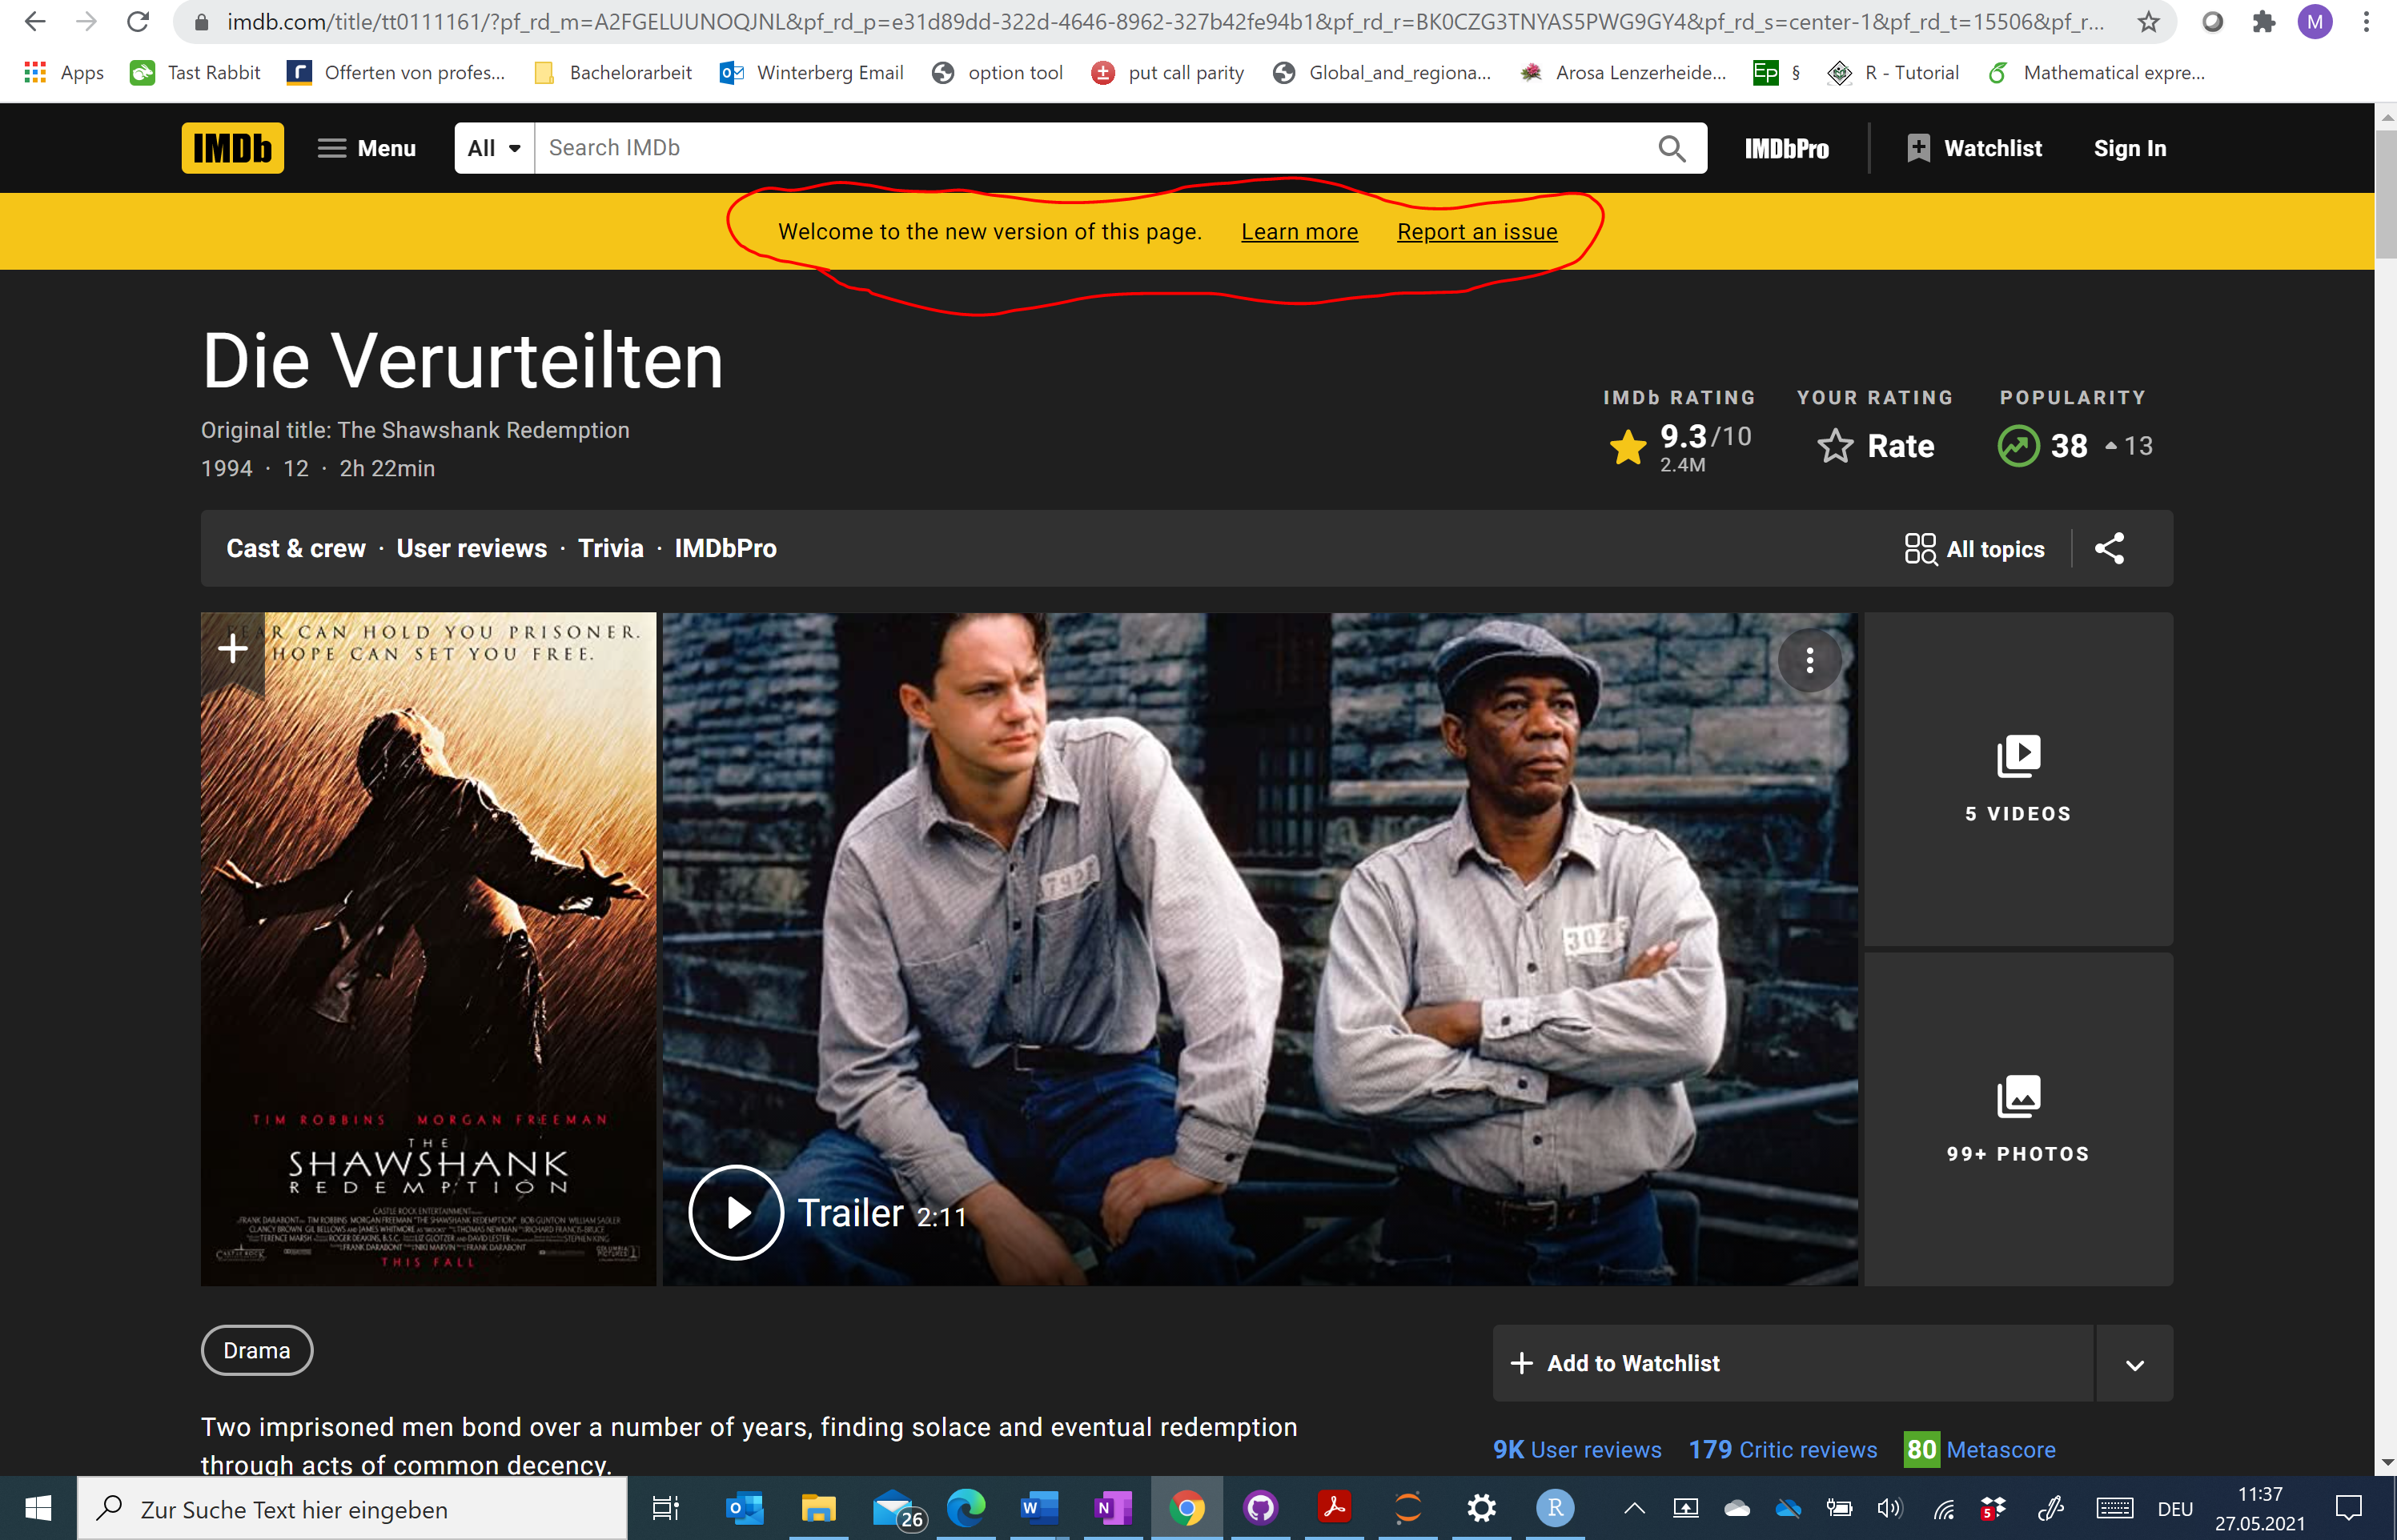

In [20]:
## unfortunately, the source html code (as well as the frontend) of the IMDb homepage was changed on monday June 24th
## Thus, the above scraper does not work for all variables originally sourced anymore.

from IPython.display import Image
Image(filename='screenshot.png')